<a href="https://colab.research.google.com/github/Muhirwakyeyune/GDA_Live_coding_FML23/blob/class/DeepLearning_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(1)
from IPython import display

In [10]:

path= '/diabetes (1).csv'
data= pd.read_csv(path)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
def scale(x):
  """
  Parameters
  -------
    x: dataframe

  Returns
  -------
    x_scaled: dataframe
  
  """
  x_scaled= (x-np.mean(x))/np.std(x)
  return x_scaled

In [12]:
data.iloc[:,:-1]= scale(data)
data.head()

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [13]:
def split_data(data, train_percent= 0.8):
  """
  Parameters
  -------
    df: a dataframe
    train_percent: a float
    

  Returns
  -------
    
    x_train: an array
    x_test: an array 
    y_train: an array
    y_test: an array
  
  """
  n = int(len(data)*train_percent)


  x_train, y_train = data.iloc[:n,:-1], data.iloc[:n,-1]
  x_test , y_test = data.iloc[n:, :-1], data.iloc[n:, -1]
  return x_train.values, x_test.values, y_train.values, y_test.values
  
  

In [14]:
x_train, x_test, y_train, y_test= split_data(data) 
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((614, 8), (614,), (154, 8), (154,))

In [15]:
a=np.array((614, 8))
a

array([614,   8])

In [16]:
def sigmoid(x):
  """
  Parameters
  ----------
    x: an array

  return
  ------

    y: 1/(1+exp(-x))

      a list of value between 0 and 1
  """
  return 1/(1 + np.exp(-x))

In [17]:
def dsigmoid(x):
  """
  Parameters
  ----------
    x: an array

  return
  ------

    y: sigmoid(x)*(1- sigmoid(x))

      a list of value of the derivative of sigmoid
  """
  return sigmoid(x)*(1- sigmoid(x))

In [18]:
def cross_entropy(y,y_pred):
  """
  Parameters
  ----------
    y: an array
    y_pred: array

  return
  ------
   : float
  """
  loss= -np.mean((y*np.log(y_pred)+ (1-y)*np.log(1-y_pred)))
  return loss

In [19]:
def forward_pass(x, w1, b1, w2, b2):
  """
  Parameters
  ---------
    x: an array of N rows
    w1: an array of shape (hidden_dim, input_dim)
    b1: an array of shape (hidden_dim, 1). Bias vector
    w2: an array of shape (output_dim, hidden_dim)
    b2: an array of shape (1, 1)
  
  Return
  ------
    z1: an array of shape (N, hidden_dim)
    a1: an array of shape (N, hidden_dim)
    z2: an array of shape (N, output_dim)
    a2: an array of shape (N, output_dim)
  """
  z1= np.dot(w1, x.T) + b1
  a1= sigmoid(z1)

  z2= np.dot(w2, a1) + b2
  a2= sigmoid(z2)


  return z1, a1, z2, a2

In [20]:
def backwardpass(x,y, w1, b1, w2, b2):
  """
  Parameters
  ---------
    x:  an array of N rows
    y:  an array of N rows
    w1: an array of shape (hidden_dim, input_dim)
    b1: an array of shape (hidden_dim, 1). Bias vector
    w2: an array of shape (output_dim, hidden_dim)
    b2: an array of shape (1, 1)
  
  Return
  ------
    dw1: an array of shape (hidden_dim, input_dim)
    db1: an array of shape (hidden_dim, 1). Bias vector
    dw2: an array of shape (output_dim, hidden_dim)
    db2: an array of shape (1, 1)
  """
  
  z1,a1,z2,a2=forward_pass(x, w1, b1, w2, b2)
  m = len(y)
  dz2 = (1 / m) * (a2 - y)
  dz1 = np.dot(w2.T, dz2) * dsigmoid(z1)
  dw1 = np.dot(dz1, x)
  db1 = np.sum(dz1, axis=1, keepdims=True)
  dw2 = np.dot(dz2, a1.T)
  db2 = np.sum(dz2, axis=1, keepdims=True)
  return dw1, db1, dw2, db2


In [34]:
def train(x,y, x_val, y_val):
  """
  Parameters
  ---------
    x:  an array of N rows
    y:  an array of N rows
    w1: an array of shape (hidden_dim, input_dim)
    b1: an array of shape (hidden_dim, 1). Bias vector
    w2: an array of shape (output_dim, hidden_dim)
    b2: an array of shape (1, 1)
  
  Return
  ------
    cost: an array of shape (num_epochs, )
    cost_test: an array of shape (num_epochs, ).
    w1: an array of shape (hidden_dim, input_dim)
    b1: an array of shape (hidden_dim, 1). Bias vector
    w2: an array of shape (output_dim, hidden_dim)
    b2: an array of shape (1, 1)
  """

  input_dim = x.shape[1]  # number of features
  hidden_dim = 789 # number of units in the hidden layer
  output_dim = 1  # number of units in the output layer
  w1 = np.random.rand(hidden_dim, input_dim) * 0.01  # (hidden_dim, input_dim)
  b1 = np.random.rand(hidden_dim, 1)  # (hidden_dim, 1)
  w2 = np.random.rand(output_dim, hidden_dim) * 0.01  # (output_dim, hidden_dim)
  b2 = np.random.rand(output_dim, 1)  # (output_dim, 1)
  lr = 0.001
  num_epochs = 1000
  cost = []
  cost_test = []
  for i in range(num_epochs):

                # Backward Pass
        dw1, db1, dw2, db2 = backwardpass(x,y, w1, b1, w2, b2)

        # Update weights
        w1 -= lr * dw1
        b1 -= lr * db1
        w2 -= lr * dw2
        b2 -= lr * db2

                # Compute the Test Loss
        z1, a1, z2, a2 = forward_pass(x, w1, b1, w2, b2)

        # Compute the Train Loss
        loss_train = cross_entropy(y, a2)
        cost.append(loss_train)

                        # Compute the Test Loss
        z1, a1, z2, a2 = forward_pass(x_val, w1, b1, w2, b2)

        loss_test = cross_entropy(y_val, a2)
        cost_test.append(loss_test)



  return cost, cost_test, w1, b1, w2, b2

In [35]:
def accuracy(y, y_pred):
  acc= np.mean(y_pred==y)*100
  return acc

In [36]:
threshold= 0.5
def get_class(x):
  _,_,_,proba= forward_pass(x, w1, b1, w2, b2) # Get probability of x
  proba= proba.squeeze(0)
  result= [1 if i> threshold else 0 for i in proba] # Convert proba to 0 or 1. hint: list comprehension
  return np.array(result), proba

In [37]:

# train the model
#cost, cost_test, w1, b1, w2, b2 = train(x_train.T, y_train_reshaped, x_test.T, y_test)

cost, cost_test, w1, b1, w2, b2= train(x_train,y_train, x_test, y_test)

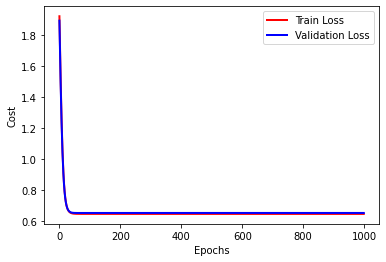

In [38]:
def plot(cost, cost_test):
  plt.xlabel('Epochs')
  plt.ylabel('Cost')
  plt.plot(np.arange(len(cost)), cost, 'r', linewidth = "2", label= 'Train Loss')
  plt.plot(np.arange(len(cost_test)), cost_test, 'b', linewidth = "2", label= 'Validation Loss')
  plt.legend()
  plt.show()
  
plot(cost, cost_test)

In [39]:
y_pred, y_proba= get_class(x_test)

In [40]:
accuracy(y_test, y_pred)

64.28571428571429

# NN Class

In [28]:
# BGD
class NN:
  def __init__(self, x_test, y_test, size, num_epochs= 1000, lr= 0.001, threshold= 0.5):
    self.num_epochs= num_epochs
    self.lr= lr
    self.threshold=threshold 
    self.cost_train=[]
    self.size= size
    self.x_test=x_test 
    self.y_test= y_test
    self.params= self.weight_initialization()

  def sigmoid(self,x):
    return 1/( 1 + np.exp(-x))
  
  def dsigmoid(self,x):
    return self.sigmoid(x)*(1-self.sigmoid(x))


  def cross_entropy(self,y,y_pred):
    loss= (1/(len(y)))*np.sum(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))
    return loss
  
  def weight_initialization(self):
    input_dim= self.size[0]
    hidden_dim= self.size[1]
    output_dim= self.size[2]


    params = {
            'w1':np.random.rand(hidden_dim, input_dim)*0.01,
            'b1':np.random.rand(hidden_dim,1),
            'w2':np.random.rand(output_dim, hidden_dim)*0.01,
            'b2':np.random.rand(1,1) 
        }

    return params

  def forward_pass(self, x):
    params= self.params
    z1=np.dot(params['w1'],x.T) +params['b1']
    a1=self.sigmoid(z1)
    z2=np.dot(params['w2'], a1)+ params['b2']
    a2=self.sigmoid(z2)
    

    # ForwardPass
   
    return z1, a1, z2, a2
  
  def backward_pass(self, x, y):
    params = self.params
    m = x.shape[0]

    z1, a1, z2, a2 = self.forward_pass(x)

    dz2 = (1 / m) * (a2 - y)
    dw2 = np.dot(dz2, a1.T)
    db2 = np.sum(dz2, axis=1, keepdims=True)

    dz1 = np.dot(params['w2'].T, dz2) * self.dsigmoid(z1)
    dw1 = np.dot(dz1, x)
    db1 = np.sum(dz1, axis=1, keepdims=True)

    return dw1, db1, dw2, db2

  def fit(self, x, y):

    for i in range(self.num_epochs):

      # Get Params
      dw1, db1, dw2, db2=self.backward_pass( x, y)
      params= self.params

      params['w1'] -= self.lr *dw1
      params['b1'] -= self.lr *db1
      params['w2'] -= self.lr *dw2
      params['b2'] -= self.lr *db2
      z1, a1, z2, a2=self.forward_pass(x)
      loss_train = cross_entropy(y, a2)
      self.cost_train.append(loss_train)

  
    
  
  def get_class(self, x):
    w1, b1, w2, b2= self.params['w1'], self.params['b1'], self.params['w2'], self.params['b2']
    _,_,_,proba= self.forward_pass(x) 
    proba= proba.squeeze(0)
    result= [1 if i> threshold else 0 for i in proba] # Convert proba to 0 or 1. hint: list comprehension
    return np.array(result), proba

  def accuracy(self, y,y_pred):
    return np.mean(y==y_pred)*100
  def plot(self):
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.plot(np.arange(len(self.cost_train)), self.cost_train, 'r', linewidth = "2", label= 'Train Loss')
    plt.legend()
    plt.show()

In [29]:
size= [x_train.shape[1], 16, 1]
model= NN(x_test, y_test, size, num_epochs= 2000, lr= 0.001)

In [30]:
model.fit(x_train, y_train)

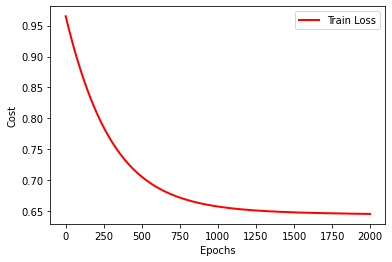

In [31]:
model.plot()

In [32]:
y_pred= model.get_class(x_test)

In [33]:
model.accuracy(y_pred, y_test)

32.142857142857146